In [2]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt,pi,exp
import time 


In [3]:
height = 5 #height of moon
sigma_l=2 #std of sensor

#position=np.array([1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 , 10]) 
position=np.array([10 , 9 , 8 ,7 , 6 , 5 , 4 , 3 , 2 , 1]) 

size=len(position)

belief_l= np.array([1/size]*size ) # Prior

# Fake measurements
measurement = np.random.normal(7.81, sigma_l, 60)

epsilon=0.00007

Gaussian_l =[0.0]*size
mean_l =[0]*size

In [4]:
#Printing Values

for idx,i in enumerate(position) :
    
    print(idx," ",position[idx], " ",height , measurement[idx] , belief_l[idx])
    


0   10   5 8.595855630960934 0.1
1   9   5 7.38041722524458 0.1
2   8   5 5.154282598126236 0.1
3   7   5 5.691265819535083 0.1
4   6   5 8.160693661919414 0.1
5   5   5 6.267140843785834 0.1
6   4   5 8.31468848978744 0.1
7   3   5 6.159421387291979 0.1
8   2   5 6.720498226968551 0.1
9   1   5 7.58648581792848 0.1


In [5]:
#Calculating Mean of states (0 to 9)

for idx,i in enumerate(position) :
     
    mean_l[idx] = (sqrt (((position[idx])**2) + (height**2)))

print(mean_l)
    

[11.180339887498949, 10.295630140987, 9.433981132056603, 8.602325267042627, 7.810249675906654, 7.0710678118654755, 6.4031242374328485, 5.830951894845301, 5.385164807134504, 5.0990195135927845]


In [6]:
# #Calculating Likelihood of the measurement

# for idx, i in enumerate(position):
    
#     Gaussian[idx] = (1/sigma*(sqrt(2*pi))) * exp(-0.5 * ((measurement - mean[idx])/sigma)**2)
    
# print(Gaussian)

<IPython.core.display.Javascript object>


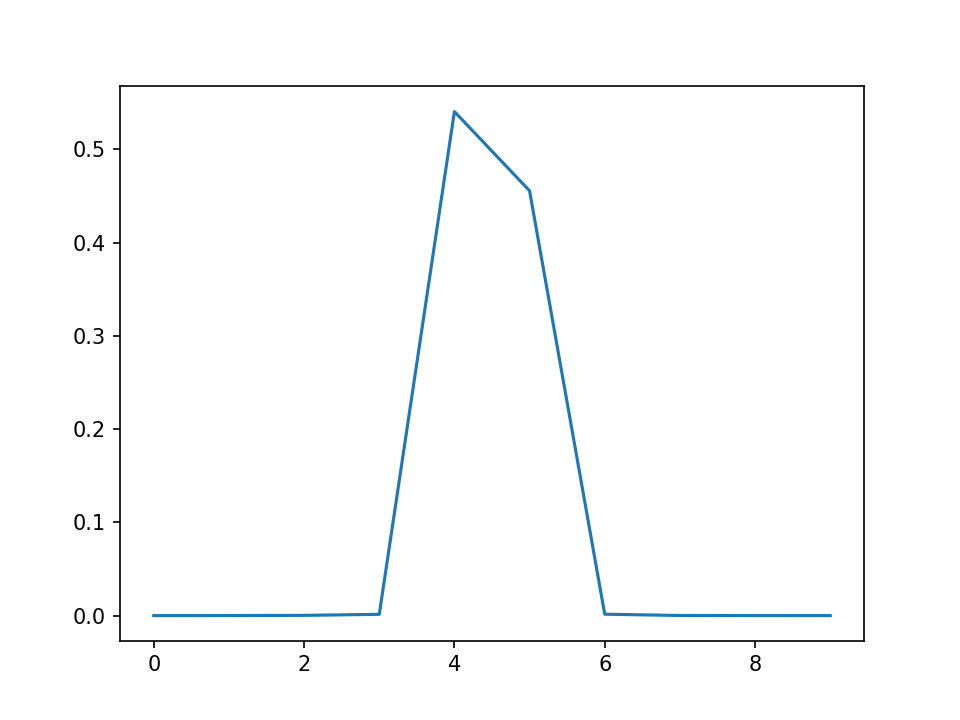

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()

fig.show()
fig.canvas.draw()

num_bars=10




#Calculating Posterior and updating belief 

for m in range(len(measurement)):
    
    #Bayes iteration    
    belief_sum_l = 0

    
    #print(measurement[m])
    
    #Finding likelihood and posterior for measurement[m] 

    for idx in range(len(position)):


        #print(Gaussian[idx] ,measurement[m] , mean[idx] , pi ,epsilon)
        
        Gaussian_l[idx] = (1/sigma_l*(sqrt(2*pi))) * exp(-0.5 * ((measurement[m] - mean_l[idx])/sigma_l)**2)
        
        #Finding posterior           

        belief_l[idx]= belief_l[idx] * Gaussian_l[idx] + epsilon #Posterior
        
        belief_sum_l+= belief_l[idx]
      
    
    #normalize posterior
    belief_l = belief_l/belief_sum_l
    
#     n , bins , patches = plt.hist(belief,num_bars,facecolor='green',alpha=1)

    
#     plt.show()
    
    #plotting
    ax.clear()
    ax.plot(belief_l)
    fig.canvas.draw()
    plt.pause(1/30)


   


    
    
